In [9]:
'''
    Data Driven Yale: Analytical regionalization & Social media data
        I: subset and structure social media data
'''

%matplotlib inline

import csv
import pandas as pd
import numpy as np 
import pickle
from pprint import pprint

import json 
import geojson
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
from shapely.geometry import shape, Point

from matplotlib.path import Path
import matplotlib.patches as patches

import sqlite3
import warnings
warnings.filterwarnings(action='once')

In [10]:
# define functions for data manipultation

def subsetPoints(poly, df): 
    bounds = poly.bounds
    df.loc[(df['lat'] >= bounds[1]) & (df['lat'] <= bounds[3]) \
        & (df['lon'] >= bounds[0]) & (df['lon'] <= bounds[2])]
    return df

def getInPolyPoints(poly, df): 
    bounds = poly.bounds
    d = df.loc[(df['lat'] >= bounds[1]) & (df['lat'] <= bounds[3]) \
        & (df['lon'] >= bounds[0]) & (df['lon'] <= bounds[2])]
    d['labelInPoly'] = d.apply(lambda row: labelInPoly(row), axis=1)
    return d.loc[d['labelInPoly'] == 'in']

def labelInPoly(row): 
    point = Point(row['lon'], row['lat'])
    out = 'out'
    if poly.contains(point):
            out = 'in'
    return out

In [11]:
# load social media data 

data = [] 
excpt = [] 
with open('../data/angel_de.txt') as f:
    for line in f:
        try: 
            out = line.split(',')
            row = out[0:4]
            data.append(row)
        except:
            excpt.append(line)

            
# load geojson data to display geographic coverage

with open("../data/beijing.geojson") as json_file:
    json_data = geojson.load(json_file)

In [12]:
# reduce columns to eliminate text data / convert lat lon to float

wbDat = pd.DataFrame(data)
wbDat.columns = ['unID', 'lon', 'lat', 'timestamp']
wbDat.reset_index(inplace=True)
wbDat['lon'] = wbDat.apply(lambda row: np.float(row['lon']), axis=1)
wbDat['lat'] = wbDat.apply(lambda row: np.float(row['lat']), axis=1)


wbDat.head()

,index,unID,lon,lat,timestamp
0,0,"""0101000020E61000007C60C77F81925D406A6CAF05BD2...",118.289154,30.155228,"""2012-01-01 19:16:34"""
1,1,"""0101000020E6100000E1D1C6116BEF5B40992A1895D4C...",111.740910,30.788400,"""2012-01-01 09:26:25"""
2,2,"""0101000020E6100000E1D1C6116BEF5B40992A1895D4C...",111.740910,30.788400,"""2012-01-01 09:23:21"""
3,3,"""0101000020E6100000930035B56CEF5B40168733BF9AC...",111.741010,30.764080,"""2012-01-01 09:22:20"""
4,4,"""0101000020E6100000E65C8AABCAF25B408E3BA583F5C...",111.793620,30.812340,"""2012-01-01 09:21:18"""


In [14]:
# connect to db of baidu labels to subest data to ROI

con = sqlite3.connect('/Users/culhane/Downloads/google.db')
cursor = con.cursor()
cursor.execute("SELECT * FROM google_result;")
dat = cursor.fetchall() 
dfg = pd.DataFrame(dat)
dfg.head()

,0,1,2,3,4,5,6,7,8
0,1,116.407395,39.904211,Beijing,"locality,political",Beijing,ChIJuSwU55ZS8DURiqkPryBWYrk,6e8861ded5d03c5fdfe7a56526af08ecb433a575,GOOGLE
1,2,116.310032,39.984396,Baidu Online Network Technology （Beijing） Limi...,"point_of_interest,establishment","理想国际大厦12层, 58 North 4th Ring Road West, Haidian",ChIJtXh6LUxR8DURcLZvxY8VsRk,7247922ff68c2f082fba4e55d384ef18cb563203,GOOGLE
2,3,116.310478,39.983621,Nanyang Commercial Bank 24-hour Self-service Bank,"atm,finance,point_of_interest,establishment","Haidian Middle Street, Haidian",ChIJQ3hdwE1R8DURf7Fq0qeJCNw,8888b49c88a08316c4a3e6c29b8ab88fe9fc0058,GOOGLE
3,4,116.309864,39.984569,Beijing Infiniti Shenzhou Network Technology L...,"point_of_interest,establishment","58 North 4th Ring Road West, Haidian",ChIJT5PELUxR8DURBwrlKAd0k3w,9c0e0dcdab87f381fdf94ec337a2814ab627a918,GOOGLE
4,5,116.310565,39.984241,Citibank,"bank,finance,point_of_interest,establishment","58 North 4th Ring Road West, Haidian, Beijing",ChIJLepx0k1R8DURlvZFTlgCHas,3b2f811807cb40d1a713c67c390ec83b05648c36,GOOGLE


In [15]:
# use label region to subset social media points

dfpoints = dfg[[1, 2]]
dfpoints.columns = ['lon','lat']

maxLon, minLon = np.max(dfpoints['lon']), np.min(dfpoints['lon'])
maxLat, minLat = np.max(dfpoints['lat']), np.min(dfpoints['lat'])

wbSub = weibo_subset.loc[(weibo_subset['lon'] >= minLon) & (weibo_subset['lon'] <= maxLon)]
wbSub = wbSub.loc[(wbSub['lat'] >= minLat) & (wbSub['lat'] <= maxLat)]

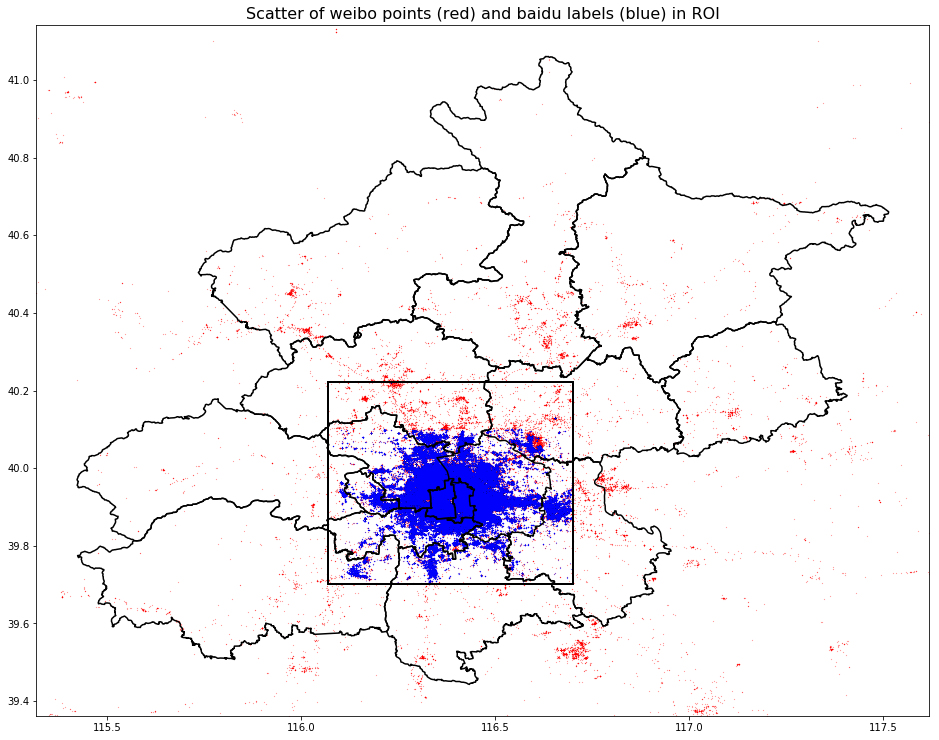

In [21]:
# plot the subset social media data over beijing
fig = plt.figure(figsize=(16,16)) 
feats = json_data['features']
for i in range(0, len(feats)): 
    try: 
        test = feats[i]
        poly = test['geometry']
        coords = poly['coordinates']
        x = [i for i,j in coords[0]]
        y = [j for i,j in coords[0]]
        ax = fig.gca() 
        # ax.plot(x,y)
        ax.plot(x, y, color='black')
        ax.axis('scaled')
    except: 
        # print('failed to add polygon with index ' + str(i))
        o = 9

# add scatter of weibo points in red
xa, ya = wbDat[['lon']], wbDat[['lat']]
ax.scatter(xa, ya, color='red', s=0.02)

# plot bounding rectangle of baidu labels
verts = [(minLon, maxLat), (maxLon, maxLat), (maxLon, minLat), (minLon, minLat), (minLon, maxLat),]
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

# plot scatter of baidu labels in blue
xd, yd = dfpoints[['lon']], dfpoints[['lat']]
ax.scatter(xd, yd, color='blue', s=0.009)

# reveal plot
plt.title('Scatter of weibo points (red) and baidu labels (blue) in ROI', fontsize=16)
plt.show()

In [22]:
wbSub.to_csv('../data/inLabelRegionPoints.csv')